# Climate Change India NLP 2017
The primary goal of this script is to analyze the sentiment of climate change news articles published in India from 2013- 2016. To do this, I will first use a data set from Jogesh 2012, that has manually coded sentiments to train my model. I will then fit this model to the new data.

1. Data clean up
2. Use weblinks to get newsarticle content and text using the newspaper library
3. Use NLP to clean the text data 
4. Use machine learning to associate words to sentiments in training data
5. Apply this to test data 

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
df2017all = pd.read_csv('data2010_2017.csv', parse_dates=True)
df2017 = df2017all[['link_works','date','Month','Year','Publications','url','theme','theme2','Mit or Adpt','equity & justice/ burden sharing',
                    'impact location if intl','fulltext']]

In [2]:
df2017['equity']=df2017['equity & justice/ burden sharing'].replace(['[a-zA-Z]'], 1, regex=True)
df2017['equity'].fillna(0, inplace=True)
df2017['equity & justice/ burden sharing'].value_counts() ## all values coded as 1 and NAs coded with 0

BP     302
BD       4
IJP      3
GJP      1
Name: equity & justice/ burden sharing, dtype: int64

In [3]:
df2017['scope']=df2017['impact location if intl'].replace(['US'], 'GLO')
df2017['scope']=df2017['scope'].replace(['EU'], 'GLO')
df2017['scope']=df2017['scope'].replace(['UK'], 'GLO')
df2017['scope']=df2017['scope'].replace(['DC'], 'GLO')
df2017['scope']=df2017['scope'].replace(['AC'], 'GLO')
df2017['scope']=df2017['scope'].replace(['POL'], 'GLO')
df2017['scope']=df2017['scope'].replace(['iND'], 'IND')

df2017['scope'].value_counts()

IND     569
GLO     461
ACDC    171
HIM       4
SIS       4
SA        3
ACS       1
BI        1
Name: scope, dtype: int64

In [4]:
df2017['Mit or Adpt']= df2017['Mit or Adpt'].str.lower()
df2017['Mit or Adpt']=df2017['Mit or Adpt'].replace(['m&a'], 'mit')
df2017['Mit or Adpt']=df2017['Mit or Adpt'].replace(['m&t'], 'mit')
df2017['Mit or Adpt']=df2017['Mit or Adpt'].replace(['adapt'], 'adpt')
df2017['Mit or Adpt']=df2017['Mit or Adpt'].replace(['geo'], 'adpt')
df2017['Mit or Adpt'].value_counts()

mit     653
adpt    120
Name: Mit or Adpt, dtype: int64

In [5]:
##Broad themes
themes = df2017[['theme','theme2']]

broad_themes=themes.replace(['GPL'], 'Policy')
broad_themes=broad_themes.replace(['IPL'], 'Policy')
broad_themes=broad_themes.replace(['MPL'], 'Policy')
broad_themes=broad_themes.replace(['ICM'], 'Policy')
broad_themes=broad_themes.replace(['TRC'], 'Policy')
broad_themes=broad_themes.replace(['CM'], 'Policy')

broad_themes=broad_themes.replace(['[a-zA-Z]*S$'], 'Science', regex=True)
broad_themes=broad_themes.replace(['BBZ'], 'Buisness')
broad_themes=broad_themes.replace(['GBBZ'], 'Buisness')
broad_themes=broad_themes.replace(['PBZ'], 'Buisness')
broad_themes=broad_themes.replace(['GPBZ'], 'Buisness')
broad_themes=broad_themes.replace(['MPBZ'], 'Buisness')

broad_themes=broad_themes.replace(['[a-zA-Z]*P$'], 'Politics', regex=True)
broad_themes=broad_themes.replace(['[a-zA-Z]*PT$'], 'Politics', regex=True)

broad_themes=broad_themes.replace(['GPE'], 'Energy_Policy', regex=True)
broad_themes=broad_themes.replace(['IPE'], 'Energy_Policy', regex=True)
broad_themes=broad_themes.replace(['MPE'], 'Energy_Policy', regex=True)

broad_themes=broad_themes.replace(['[a-zA-Z]*TD$'], 'Trends', regex=True)


df2017['broad_themes1'] = broad_themes.theme
df2017['broad_themes2'] = broad_themes.theme2
df2017.broad_themes1.value_counts()

Policy           388
Politics         315
Science          302
Energy_Policy     90
Buisness          61
Trends            52
IPBZ               2
IN                 1
MBBZ               1
Name: broad_themes1, dtype: int64

In [6]:
df2017_encoded1 = pd.get_dummies(df2017, columns=['broad_themes1', 'broad_themes2'])
df2017_encoded2 = pd.get_dummies(df2017_encoded1, columns=['Mit or Adpt'])
df2017_encoded = pd.get_dummies(df2017_encoded2, columns=['scope'])

In [7]:
df2017_encoded['Buisness'] = df2017_encoded['broad_themes1_Buisness']+df2017_encoded['broad_themes2_Buisness'] 
df2017_encoded['Policy'] = df2017_encoded['broad_themes1_Policy']+df2017_encoded['broad_themes2_Policy'] 
df2017_encoded['Energy_Policy'] = df2017_encoded['broad_themes1_Energy_Policy']+df2017_encoded['broad_themes2_Energy_Policy'] 
df2017_encoded['Politics'] = df2017_encoded['broad_themes1_Politics']+df2017_encoded['broad_themes2_Politics'] 
df2017_encoded['Science'] = df2017_encoded['broad_themes1_Science']+df2017_encoded['broad_themes2_Science'] 
df2017_encoded['Trends'] = df2017_encoded['broad_themes1_Trends']+df2017_encoded['broad_themes2_Trends'] 

In [8]:
cols_to_drop = ['broad_themes1_Buisness',
                'broad_themes2_Buisness',     
                'broad_themes1_Policy',       
                'broad_themes2_Policy', 
                'broad_themes1_Energy_Policy',       
                'broad_themes2_Energy_Policy', 
                'broad_themes1_Politics',     
                'broad_themes2_Politics',
                'broad_themes1_Science',
                'broad_themes2_Science',
                'broad_themes1_Trends',      
                'broad_themes2_Trends']
df2017_encoded.drop(cols_to_drop, inplace=True, axis=1)

In [9]:
df2017_encoded.Buisness[df2017_encoded.Buisness>1]=1
df2017_encoded.Science[df2017_encoded.Science>1]=1
df2017_encoded.Politics[df2017_encoded.Politics>1]=1
df2017_encoded.Energy_Policy[df2017_encoded.Energy_Policy>1]=1
df2017_encoded.Policy[df2017_encoded.Policy>1]=1
df2017_encoded.Trends[df2017_encoded.Trends>1]=1

In [10]:
df2017_encoded['ind'] = df2017_encoded.index
df2017_encoded.head()

,link_works,date,Month,Year,Publications,url,theme,theme2,equity & justice/ burden sharing,impact location if intl,...,scope_IND,scope_SA,scope_SIS,Buisness,Policy,Energy_Policy,Politics,Science,Trends,ind
0,NaN,2,Jan,2013.0,DH,http://www.deccanherald.com/content/302534/ire...,GPL,NaN,NaN,AC,...,0,0,0,0,1,0,0,0,0,0
1,NaN,2,Jan,2013.0,BL,http://www.thehindubusinessline.com/opinion/do...,MP,NaN,BP,ACDC,...,0,0,0,0,0,0,1,0,0,1
2,NO LINK,16,Jan,2013.0,TOI,http://www.reuters.com/article/us-climate-blac...,SS,GS,NaN,GLO,...,0,0,0,0,0,0,0,1,0,2
3,NO LINK,16,Jan,2013.0,ET,http://www.reuters.com/article/us-climate-blac...,SS,GS,NaN,GLO,...,0,0,0,0,0,0,0,1,0,3
4,NaN,16,Jan,2013.0,MNT,http://www.livemint.com/Politics/NRE3pEeW6HmZ1...,SS,GS,NaN,GLO,...,0,0,0,0,0,0,0,1,0,4


In [145]:
Train_URLcount=df2017_encoded[['Publications', 'Month','Year']].groupby(['Month','Year']).agg('count')
Train_URLcount.to_csv("Train2017_URLcount.csv")

## Extract Newspaper data from html links

In [13]:
from newspaper import Article
import requests


def html_to_text( urls, ind ):
    ###for newspaper articles, this extracts the content from the html links using the Newspaper
    ###library http://newspaper.readthedocs.io/en/latest/
    request = requests.get(urls)
    if request.status_code == 200:
        a = Article(urls)  
        a.download()
        a.parse()
        #a.nlp() #takes to long and not nessesary for now
        text = a.text
        title = a.title
        authors = a.authors
        date = a.publish_date
        sourceurl = a.source_url
        #keywords = a.keywords
        data =(ind,text,title,sourceurl,authors,date)
    else:
        data =('NA','NA','NA','NA','NA')
    return(data)

#testing the function on the first link    
#data =html_to_text(df_encoded['Link'][0],0)
#print(data)

In [15]:
import os
import pickle

if os.path.exists("2017_pickle.p"):
    print("2017 news Data already downloaded")
    Alldata = pickle.load(open("2017_pickle.p", "rb"))
else:
    Alldata =[]
    Narticles = df2017_encoded["url"].size
    print "Extracting data from online news weblinks...\n"
    for i in xrange(0, Narticles):
        try:
            Alldata.append(html_to_text(df2017_encoded["url"][i],i))
            if( (i+1)%100 == 0 ):
                print "Downloading %d of %d\n" % ( i+1, Narticles )
        except:
            pass
    pickle.dump(Alldata, open("2017_pickle.p", "wb"))    
        

Extracting data from online news weblinks...













Traceback (most recent call last):
  File "/Users/taniajogesh/anaconda/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/Users/taniajogesh/anaconda/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/Users/taniajogesh/anaconda/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582, in lxml.etree._ParserContext._handleParseRes

In [61]:
newsdf = pd.DataFrame(eval('Alldata')) #not sure i understand why i use eval
newsdf.columns = ['ind','text', 'title','source','author','date_web']

#merges text with original file to asssociate the sentiment
newsdf_all =pd.merge(newsdf, df2017_encoded, left_on='ind', right_on='ind', how='right')


#print(newsdf.columns.values)

print("Number of articles with webscraped text: "+str(len(newsdf)))
print("Number of total articles: "+str(len(newsdf_all)))

Number of articles with webscraped text: 1138
Number of total articles: 1218


In [62]:
newsdf_all.head()

,ind,text,title,source,author,date_web,link_works,date,Month,Year,...,scope_HIM,scope_IND,scope_SA,scope_SIS,Buisness,Policy,Energy_Policy,Politics,Science,Trends
0,0.0,"Over the last three years, with its economy in...",Ireland's carbon tax pays big dividends,http://www.deccanherald.com,[Elisabeth Rosenthal],2013-01-02 22:45:19+05:30,NaN,2,Jan,2013.0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,"“…frustration is a renewable resource, but fru...",Doha climate talks not a failure,http://www.thehindubusinessline.com,[],None,NaN,2,Jan,2013.0,...,0,0,0,0,0,0,0,1,0,0
2,2.0,"WASHINGTON (Reuters) - Black carbon, the soot ...",Black carbon a powerful climate pollutant: int...,http://www.reuters.com,[Environment Correspondent Deborah Zabarenko],2013-01-15 18:36:08+00:00,NO LINK,16,Jan,2013.0,...,0,0,0,0,0,0,0,0,1,0
3,3.0,"WASHINGTON (Reuters) - Black carbon, the soot ...",Black carbon a powerful climate pollutant: int...,http://www.reuters.com,[Environment Correspondent Deborah Zabarenko],2013-01-15 18:36:08+00:00,NO LINK,16,Jan,2013.0,...,0,0,0,0,0,0,0,0,1,0
4,4.0,"Updated: Fri, Feb 01 2013. 09 12 AM IST\n\nWas...",Global temperatures above average in 2012,http://www.livemint.com,[],2013-01-16 09:58:25+05:30,NaN,16,Jan,2013.0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
newsdf_all.text = newsdf_all.text.fillna(value=newsdf_all.fulltext)

In [70]:
newsdf_all=newsdf_all.dropna(subset=['text'])

In [87]:
newsdf_all.reset_index(inplace=True)

## Extract meaningful words from news articles

In [76]:
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import SnowballStemmer

porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer("english")


def text_to_words( rawtext, stemming=True ):
    # Function to convert a raw review to a string of words
    # The input is a single string, and 
    # the output is a single string
    #
    # 1. Remove HTML
    news_text = BeautifulSoup(rawtext).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", news_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))
    # add additonal words that are prominent but not meaningful
    added_stop_words =["one","would","also","subscription","subscribe","newsletter","click","thank","email","sent","link","said","use"]
    stops |= set(added_stop_words)
    #
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    if stemming:
        stemmed_words =[]
        for w in meaningful_words: 
            stemmed_words.append(snowball_stemmer.stem(w))
        return( " ".join( stemmed_words ))
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    else:
        return( " ".join( meaningful_words ))  

#test function
#clean_text = text_to_words(subset['fulltext'][1], True )
#print(clean_text)


In [90]:
#  the number of articles
num_articles = newsdf_all['text'].size
print("Extracting words from "+ str(num_articles)+" articles")

# Initialize an empty list to hold the clean text
clean_news_text = []

# Loop over each article text; create an index i that goes from 0 to the length
# of the list 
for i in xrange( 0, num_articles ):
    # Call the function for each one, and add the result to the list of
    # clean reviews
     # If the index is evenly divisible by 1000, print a message
    if( (i+1)%100 == 0 ):
        print "Article %d of %d\n" % ( i+1, num_articles )  
    clean_news_text.append( text_to_words( newsdf_all['text'][i], True ) )
    
print("Extracted "+ str(len(clean_news_text))+" articles")

Extracting words from 1117 articles
Article 100 of 1117

Article 200 of 1117

Article 300 of 1117

Article 400 of 1117

Article 500 of 1117

Article 600 of 1117

Article 700 of 1117

Article 800 of 1117

Article 900 of 1117

Article 1000 of 1117

Article 1100 of 1117

Extracted 1117 articles


In [91]:
newsdf_all['text_words'] =clean_news_text

In [92]:
newsdf_all['text_words'].to_csv('train_words.csv')

In [93]:
remove=[''
,'access time india news move new innov app deliv speed breadth insight time journal comprehens news stream across differ platform'
,'sorri page look longer avail go home'
,'never miss great news stori get instant notif econom time allownot switch notif anytim use browser set'
,'hello creat profil creat profil enabl submit photo stori get publish news pleas provid usernam profil page usernam must uniqu cannot edit use url profil page across entir com network'        
,'cooki polici zeenew india com understand privaci import commit transpar technolog cooki polici explain cooki similar technolog may store access devic visit zeenew india com websit post polici collect site cooki polici read togeth privaci polici continu brows site agre store access cooki track technolog describ polici cooki track technolog cooki small text file store access devic visit site extent agre track technolog work similar cooki place small data file devic monitor websit activ enabl us collect inform site allow site recogn devic user site inform provid cooki appli track technolog site cooki track technolog zeenew com cooki technolog store inform web browser mobil phone tablet comput devic collect devic allow us store receiv certain piec inform whenev interact zeenew india com applic site cooki technolog help us identifi interest rememb prefer track zeenew india com cooki track technolog control access certain content site protect site process request make us cooki administ site research purpos zeenew india com contract third parti servic provid track analys statist usag volum inform site user third parti servic provid persist cooki help us improv user experi manag site content analys user navig util site first third parti cooki first parti cooki cooki belong us place devic set websit visit user time e g cooki place zeenew india com third parti cooki featur use websit may involv cooki comput third parti exampl view listen embed audio video content may cooki site embed content host likewis share content websit social network exampl click facebook like button tweet button may cooki websit control set cooki pleas check websit third parti inform cooki manag follow type cooki persist cooki persist cooki improv experi use site includ record accept cooki polici remov cooki messag first appear visit site session cooki session cooki temporari delet machin web browser close session cooki help us track internet usag describ may refus accept browser cooki activ appropri set browser howev select set may unabl access certain part site unless adjust browser set refus cooki system check cooki captur direct browser site data collect site cooki may place comput kept longer necessari fulfil purpos mention event inform kept databas get explicit consent remov store cooki categor cooki follow essenti cooki cooki essenti site order enabl move around featur without essenti cooki may abl provid certain servic featur site perform smooth like cooki exampl let us recogn creat account log access site content includ cooki enabl us rememb previous action within brows session secur site analyt perform cooki cooki use us third parti servic provid analys site use perform exampl cooki track content frequent visit view histori locat visitor come otherwis regist site cooki may correl function cooki cooki let us oper site accord choic make cooki permit us rememb visit instanc recogn user name rememb custom site servic exampl adjust text size font languag part web page alter provid custom futur visit advertis cooki cooki collect inform activ site well site provid target advertis may allow third parti servic provid cooki site purpos identifi includ collect inform onlin activ time across differ websit third parti servic provid generat cooki social media platform privaci polici may cooki target advertis websit base visit site refus withdraw consent cooki want cooki drop devic adjust set internet browser reject set cooki alert cooki place devic inform pleas refer browser help tool edit section cooki set w r browser may googl chrome safari mozilla firefox etc pleas note browser set alreadi setup block cooki includ strict necessari cooki may abl access part function site want remov previous store cooki manual delet cooki time browser set howev prevent site place cooki devic unless adjust internet browser set describ inform develop user profil target advertis cooki pleas see www youronlinechoic eu locat europ www aboutad info choic unit state contact us question cooki polici pleas contact us requir inform clarif regard person inform privaci polici grievanc respect person inform pleas us respons zeemedia esselgroup com'        
,'continu site consent cooki devic describ cooki polici unless disabl chang cooki set time part site function correct without'
       ]      
        
for words in remove:
    newsdf_all = newsdf_all[newsdf_all.text_words != words]

## ------------------------------------------------------
##  MACHINE LEARNING CLASSIFIERS
## ------------------------------------------------------

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [95]:
def run_RF_ML(df,column_to_predict, max_features=1000):
    #### df dataframe with column 'text_words' has cleaned words and column name for prediction. 
    #### column_to_predict must be in 0 vs 1 format
    vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = max_features) 
    #setting the max to 5000 words and I can change this
    train_data_features = vectorizer.fit_transform(df['text_words']) # this gives a sklearn matrix 
    X = train_data_features.toarray() # this is an array of words and their instances
    Y = df[column_to_predict].values

    xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.30)
    forest = RandomForestClassifier(n_estimators = 100) 
    forest_Y = forest.fit(xtrain, ytrain)
    training_accuracy = forest_Y.score(xtrain, ytrain)
    test_accuracy = forest_Y.score(xtest, ytest)
    print("Accuracy on training data: {:2f}".format(training_accuracy))
    print("Accuracy on test data:     {:2f}".format(test_accuracy))

    # Calculate the AUC
    fpr, tpr, thresholds = roc_curve(ytest, forest_Y.predict_proba(xtest)[:,1])
    roc_auc = auc(fpr, tpr)
    print 'ROC AUC: %0.2f' % roc_auc

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = {})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return forest_Y
    
    
    

## Random forest classifier all data

Accuracy on training data: 0.998661
Accuracy on test data:     0.825545
ROC AUC: 0.89


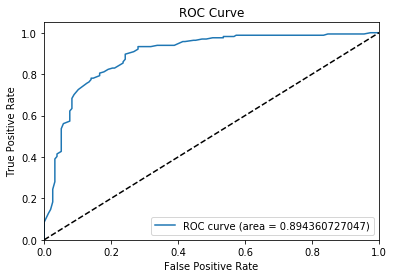

In [96]:
RFclassifier_mit= run_RF_ML(newsdf_all, 'Mit or Adpt_mit')

Accuracy on training data: 1.000000
Accuracy on test data:     0.909657
ROC AUC: 0.85


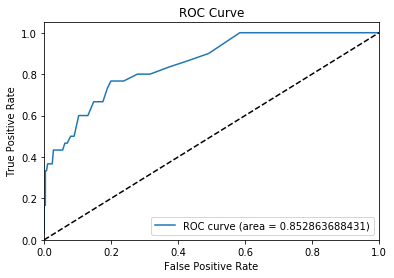

In [98]:
RFclassifier_adpt= run_RF_ML(newsdf_all, 'Mit or Adpt_adpt')

Accuracy on training data: 1.000000
Accuracy on test data:     0.922118
ROC AUC: 0.94


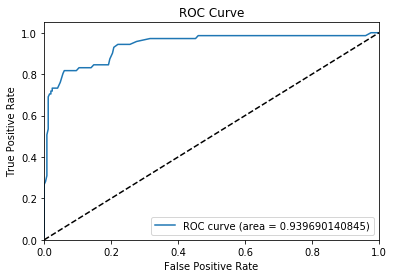

In [99]:
RFclassifier_eqi= run_RF_ML(newsdf_all, 'equity')

Accuracy on training data: 1.000000
Accuracy on test data:     0.713396
ROC AUC: 0.80


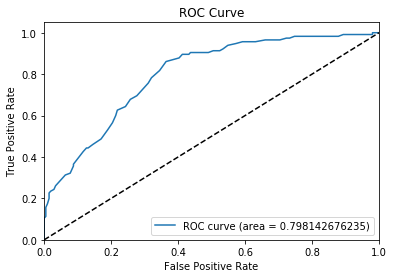

In [100]:
RFclassifier_policy= run_RF_ML(newsdf_all, 'Policy')

Accuracy on training data: 1.000000
Accuracy on test data:     0.925234
ROC AUC: 0.95


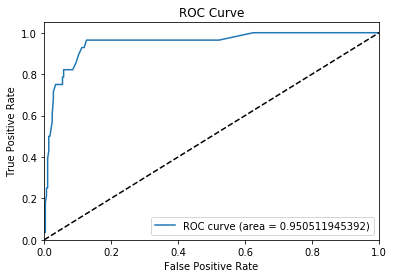

In [101]:
RFclassifier_E_policy= run_RF_ML(newsdf_all, 'Energy_Policy')

In [ ]:
### Scope Global vs Indian

Accuracy on training data: 0.998661
Accuracy on test data:     0.856698
ROC AUC: 0.93


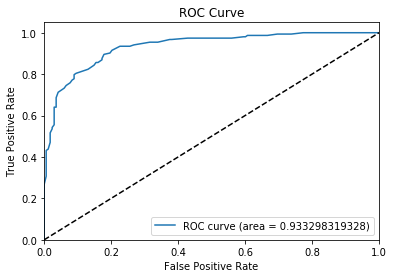

In [102]:
RFclassifier_impact_india= run_RF_ML(newsdf_all, 'scope_IND')

Accuracy on training data: 1.000000
Accuracy on test data:     0.822430
ROC AUC: 0.90


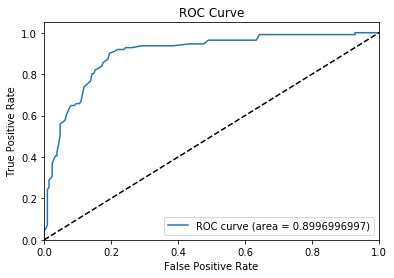

In [103]:
RFclassifier_impact_global= run_RF_ML(newsdf_all, 'scope_GLO')

Accuracy on training data: 1.000000
Accuracy on test data:     0.894081
ROC AUC: 0.84


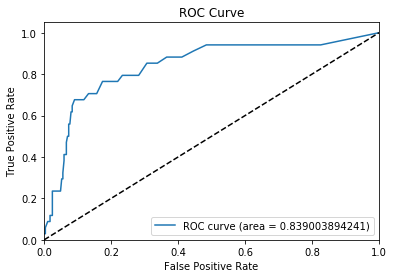

In [104]:
RFclassifier_impact_acdc= run_RF_ML(newsdf_all, 'scope_ACDC')

Accuracy on training data: 1.000000
Accuracy on test data:     0.900312
ROC AUC: 0.96


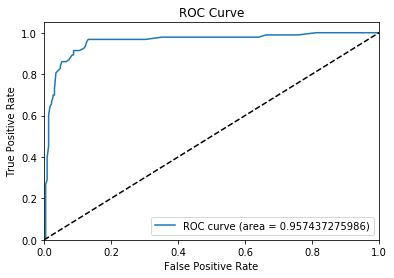

In [105]:
RFclassifier_Science= run_RF_ML(newsdf_all, 'Science')

Accuracy on training data: 1.000000
Accuracy on test data:     0.869159
ROC AUC: 0.91


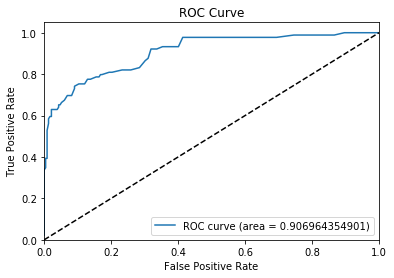

In [106]:
RFclassifier_Politics= run_RF_ML(newsdf_all, 'Politics')

Accuracy on training data: 1.000000
Accuracy on test data:     0.919003
ROC AUC: 0.83


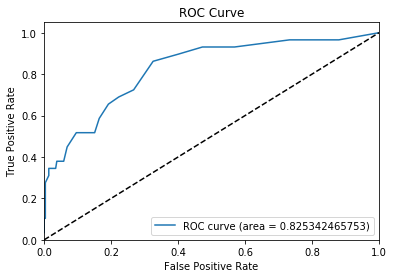

In [107]:
RFclassifier_Buisness= run_RF_ML(newsdf_all, 'Buisness')

In [120]:
%run 'CleanTestData.ipynb'

Test data already downloaded
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6290 entries, 0 to 6289
Data columns (total 9 columns):
ind         6278 non-null float64
text        6278 non-null object
title       6278 non-null object
authors     6278 non-null object
date        2614 non-null object
source      6278 non-null object
index       6290 non-null int64
month_yr    6290 non-null object
url         6290 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 491.4+ KB
   ind                                               text  \
0  0.0  more-in\n\n“Potentially catastrophic” impacts ...   
1  1.0  An Assistant Professor of GITAM University Ins...   
2  2.0  SURAT: Over 200 delegates from across the coun...   
3  3.0  Climate change is at the top of government age...   
4  4.0  SURAT: The city resilience strategy after a st...   

                                               title  \
0  Prepare for long-term climate change impacts o...   
1                        

In [121]:
%run 'CleanTestData_2010.ipynb'

Test data already downloaded
   ind                                               text  \
0  0.0  Updated: Sun, Aug 01 2010. 08 51 PM IST\n\nSho...   
1  1.0  Climate change, till now a ‘global' issue, is ...   
2  2.0  Soon after petrol prices rose, Himachal Prades...   
3  3.0  Placing sustainable development at the core of...   
4  4.0  The Youth to Youth foundation together with th...   

                                               title  \
0                               A leaderless climate   
1       Climate change in the U.K.-India partnership   
2  'I was known as anytime appointee at PM Vajpay...   
3  TANCEM places sustainable development at core ...   
4                                 Road to innovation   

                                             authors  \
0                                                 []   
1  [When A Child Faces Brutality In Or Outside Th...   
2                                    [Sanjay Sharma]   
3                                          

In [122]:
#testdf_full=testdf.append(testdf_2010)
testdf_full=pd.concat([testdf[:6278],testdf_2010], ignore_index=True)

In [123]:
testdf_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7154 entries, 0 to 7153
Data columns (total 9 columns):
ind         7146 non-null float64
text        7146 non-null object
title       7146 non-null object
authors     7146 non-null object
date        2997 non-null object
source      7146 non-null object
index       7154 non-null int64
month_yr    7154 non-null object
url         7154 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 503.1+ KB


In [124]:
testdf_full.iloc[7147]

ind                                                       NaN
text                                                      NaN
title                                                     NaN
authors                                                   NaN
date                                                      NaN
source                                                    NaN
index                                                     320
month_yr                                         January_2010
url         https://www.hindustantimes.com/india/buck-up-i...
Name: 7147, dtype: object

In [125]:
remove=[''
,'never miss great news stori get instant notif econom time allownot switch notif anytim use browser set'
,'articl page look move longer avail repositori may find follow link relev tri use advanc search option'
,'oop cannot find page look meanwhil check latest news return homepag home'
,'page found page request might longer exist name chang temporarili unavail suggest type page address url make sure spelt correct open indiatim com homepag sitemap look link inform want back button browser return previous page'
,'page found seem page look exist remov'
,'never miss great news stori get instant notif econom time allownot switch notif anytim use browser set'
,'articl page look move longer avail repositori may find follow link relev tri use advanc search option'
,'content look remov legal advis mayb like check top stori moment'
,'page look exist may mistyp address page may move come often problem persist contact us tri search'
,'page look exist may mistyp address page may move come often problem persist contact us'
,'type address separ comma'
,'page found sorri page current avail pleas see latest stori publish visit home page'
,'search topic interest websit'
,'page found page request might longer exist name chang temporarili unavail suggest type page address url make sure spelt correct open indiatim com homepag sitemap look link inform want back button browser return previous page'
,'receiv best hindu deliv inbox everyday go pleas enter valid address']

for words in remove:
    testdf_full = testdf_full[testdf_full.text_words != words]

AttributeError: 'DataFrame' object has no attribute 'text_words'

In [126]:
max_features = 1000
testdf_full=testdf_full[:7146] #last few rows are blanks
num_articles = testdf_full['text'].size
print("Extracting words from "+ str(num_articles)+" articles")

# Initialize an empty list to hold the clean text
clean_text = []

# Loop over each article text; create an index i that goes from 0 to the length
# of the list 
for i in xrange( 0, num_articles ):
    # Call the function for each one, and add the result to the list of
    # clean reviews
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%100 == 0 ):
        print "Article %d of %d\n" % ( i+1, num_articles )  
    clean_text.append( text_to_words(testdf_full['text'][i], True ))
        
testdf_full['text_words'] =clean_text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = max_features) 
#setting the max to 5000 words and I can change this
train_data_features = vectorizer.fit_transform(testdf_full['text_words']) # this gives a sklearn matrix 
test_X = train_data_features.toarray() # this is an array of words and their instances
    

Extracting words from 7146 articles
Article 100 of 7146

Article 200 of 7146

Article 300 of 7146

Article 400 of 7146

Article 500 of 7146

Article 600 of 7146

Article 700 of 7146

Article 800 of 7146

Article 900 of 7146

Article 1000 of 7146

Article 1100 of 7146

Article 1200 of 7146

Article 1300 of 7146

Article 1400 of 7146

Article 1500 of 7146

Article 1600 of 7146

Article 1700 of 7146

Article 1800 of 7146

Article 1900 of 7146

Article 2000 of 7146

Article 2100 of 7146

Article 2200 of 7146

Article 2300 of 7146

Article 2400 of 7146

Article 2500 of 7146

Article 2600 of 7146

Article 2700 of 7146

Article 2800 of 7146

Article 2900 of 7146

Article 3000 of 7146

Article 3100 of 7146

Article 3200 of 7146

Article 3300 of 7146

Article 3400 of 7146

Article 3500 of 7146

Article 3600 of 7146

Article 3700 of 7146

Article 3800 of 7146

Article 3900 of 7146

Article 4000 of 7146

Article 4100 of 7146

Article 4200 of 7146

Article 4300 of 7146

Article 4400 of 7146

Artic

In [127]:
testdf_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7146 entries, 0 to 7145
Data columns (total 10 columns):
ind           7146 non-null float64
text          7146 non-null object
title         7146 non-null object
authors       7146 non-null object
date          2997 non-null object
source        7146 non-null object
index         7146 non-null int64
month_yr      7146 non-null object
url           7146 non-null object
text_words    7146 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 558.4+ KB


In [128]:
Test_URLcount=testdf_full[['month_yr','text']].groupby('month_yr').agg('count')
Test_URLcount.to_csv("Test_URLcount")
testdf_full[['month_yr','url','text_words']].to_csv("testdf_full.csv")

In [129]:
testdf_full['mit'] = RFclassifier_mit.predict(test_X)
testdf_full['adapt'] = RFclassifier_adpt.predict(test_X)
testdf_full['equity']= RFclassifier_eqi.predict(test_X)
testdf_full['Policy']= RFclassifier_policy.predict(test_X)
testdf_full['Energy_policy']= RFclassifier_E_policy.predict(test_X) #energy policy
testdf_full['India_impact']= RFclassifier_impact_india.predict(test_X)
testdf_full['Global_impact']=RFclassifier_impact_global.predict(test_X)
testdf_full['ACDC']=RFclassifier_impact_acdc.predict(test_X)
testdf_full['Science']=RFclassifier_Science.predict(test_X)
testdf_full['Politics']=RFclassifier_Politics.predict(test_X)
testdf_full['Buisness']=RFclassifier_Buisness.predict(test_X)

In [130]:
testdf_full['year']=testdf_full['month_yr'].str.split('_').str[1]
testdf_full['month']=testdf_full['month_yr'].str.split('_').str[0]
#pd.to_datetime(testdf_full['month_yr'], infer_datetime_format=True)
testdf_full['month'].unique()
month_dict={'April':4, 'August':8, 'Dec':12, 'December':12, 'February':2, 'January':1, 'July':7,
       'June':6, 'March':3, 'May':5, 'November':11, 'October':10, 'September':9}
testdf_full['month'].replace(month_dict, inplace=True)
testdf_full['Date']=testdf_full['year'].astype(str)+testdf_full['month'].astype(str)
testdf_full['Date']=pd.to_datetime(testdf_full['Date'], format="%Y%m")
testdf_full.head()

,ind,text,title,authors,date,source,index,month_yr,url,text_words,...,Energy_policy,India_impact,Global_impact,ACDC,Science,Politics,Buisness,year,month,Date
0,0.0,more-in\n\n“Potentially catastrophic” impacts ...,Prepare for long-term climate change impacts o...,[Project Will Be On Display At Iit-delhi S Ope...,None,http://www.thehindu.com,0,April_2011,http://www.thehindu.com/sci-tech/agriculture/a...,potenti catastroph impact food product slow on...,...,0,0,1,0,0,0,0,2011,4,2011-04-01
1,1.0,An Assistant Professor of GITAM University Ins...,Research on climate change,[],None,http://www.thehindu.com,1,April_2011,http://www.thehindu.com/todays-paper/tp-nation...,assist professor gitam univers institut techno...,...,0,1,0,0,0,0,0,2011,4,2011-04-01
2,2.0,SURAT: Over 200 delegates from across the coun...,Experts to discuss sustainable urban living,[],None,http://timesofindia.indiatimes.com,2,April_2011,http://timesofindia.indiatimes.com/city/surat/...,surat deleg across countri converg monday take...,...,0,1,1,0,0,0,0,2011,4,2011-04-01
3,3.0,Climate change is at the top of government age...,Green India Inc,[Michael Bear],None,http://www.financialexpress.com,3,April_2011,http://www.financialexpress.com/news/Green-Ind...,climat chang top govern agenda across world fi...,...,0,1,0,0,0,0,0,2011,4,2011-04-01
4,4.0,SURAT: The city resilience strategy after a st...,Resilience strategy for city ready: Experts,[],None,http://timesofindia.indiatimes.com,4,April_2011,http://timesofindia.indiatimes.com/city/surat/...,surat citi resili strategi studi two year expe...,...,0,0,1,0,0,0,0,2011,4,2011-04-01


In [131]:
trends_Month_Year_sum = testdf_full[['Date',
 'mit',
 'adapt',
 'equity',
 'Policy',
 'Energy_policy',
 'India_impact',
 'Global_impact',
 'ACDC',
 'Science',
 'Politics',
 'Buisness']].groupby('Date').agg('sum')
trends_Month_Year_count = testdf_full[['Date',
 'mit',
 'adapt',
 'equity',
 'Policy',
 'Energy_policy',
 'India_impact',
 'Global_impact',
 'ACDC',
 'Science',
 'Politics',
 'Buisness']].groupby('Date').agg('count')

trends_Month_Year = trends_Month_Year_sum/trends_Month_Year_count

In [132]:
trends_Year_sum = testdf_full[['year',
 'mit',
 'adapt',
 'equity',
 'Policy',
 'Energy_policy',
 'India_impact',
 'Global_impact',
 'ACDC',
 'Science',
 'Politics',
 'Buisness']].groupby('year').agg('sum')
trends_Year_mean = testdf_full[['year',
 'mit',
 'adapt',
 'equity',
 'Policy',
 'Energy_policy',
 'India_impact',
 'Global_impact',
 'ACDC',
 'Science',
 'Politics',
 'Buisness']].groupby('year').agg('mean')
trends_Year_count = testdf_full[['year',
 'mit',
 'adapt',
 'equity',
 'Policy',
 'Energy_policy',
 'India_impact',
 'Global_impact',
 'ACDC',
 'Science',
 'Politics',
 'Buisness']].groupby('year').agg('count')

trends_Year = trends_Month_Year_sum/trends_Month_Year_count

In [133]:
trends_source_sum = testdf_full[['source',
 'mit',
 'adapt',
 'equity',
 'Policy',
 'Energy_policy',
 'India_impact',
 'Global_impact',
 'ACDC',
 'Science',
 'Politics',
 'Buisness']].groupby('source').agg('sum')
trends_source_mean = testdf_full[['source',
 'mit',
 'adapt',
 'equity',
 'Policy',
 'Energy_policy',
 'India_impact',
 'Global_impact',
 'ACDC',
 'Science',
 'Politics',
 'Buisness']].groupby('source').agg('mean')
trends_source_count = testdf_full[['source',
 'mit',
 'adapt',
 'equity',
 'Policy',
 'Energy_policy',
 'India_impact',
 'Global_impact',
 'ACDC',
 'Science',
 'Politics',
 'Buisness']].groupby('source').agg('count')

trends_source = trends_source_sum/trends_source_count

In [134]:
trends_Month_Year_count.head()

,mit,adapt,equity,Policy,Energy_policy,India_impact,Global_impact,ACDC,Science,Politics,Buisness
Date,,,,,,,,,,,
2010-01-01,171,171,171,171,171,171,171,171,171,171,171
2010-02-01,49,49,49,49,49,49,49,49,49,49,49
2010-03-01,127,127,127,127,127,127,127,127,127,127,127
2010-07-01,43,43,43,43,43,43,43,43,43,43,43
2010-08-01,116,116,116,116,116,116,116,116,116,116,116


In [135]:
trends_Month_Year['source'] = 'ML'

In [136]:
newsdf_all['Month'].unique()
month_dict={'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'APR':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8,
       'Sept':9, 'Oct':10, 'Nov':11, 'Dec':12, 'jul':7, 'AUg':8}
newsdf_all['Month'].replace(month_dict, inplace=True)
newsdf_all['Date']=newsdf_all['Year'].apply(lambda x: "{:.0f}".format(x)).astype(str)+newsdf_all['Month'].astype(str)
newsdf_all['Date']=pd.to_datetime(newsdf_all['Date'], format="%Y%m", errors='coerce')
newsdf_all.head()

,index,ind,text,title,source,author,date_web,link_works,date,Month,...,scope_SA,scope_SIS,Buisness,Policy,Energy_Policy,Politics,Science,Trends,text_words,Date
0,0,0.0,"Over the last three years, with its economy in...",Ireland's carbon tax pays big dividends,http://www.deccanherald.com,[Elisabeth Rosenthal],2013-01-02 22:45:19+05:30,NaN,2,1,...,0,0,0,1,0,0,0,0,last three year economi tatter ireland embrac ...,2013-01-01
1,1,1.0,"“…frustration is a renewable resource, but fru...",Doha climate talks not a failure,http://www.thehindubusinessline.com,[],None,NaN,2,1,...,0,0,0,0,0,1,0,0,frustrat renew resourc frustrat reduc emiss re...,2013-01-01
2,2,2.0,"WASHINGTON (Reuters) - Black carbon, the soot ...",Black carbon a powerful climate pollutant: int...,http://www.reuters.com,[Environment Correspondent Deborah Zabarenko],2013-01-15 18:36:08+00:00,NO LINK,16,1,...,0,0,0,0,0,0,1,0,washington reuter black carbon soot produc bur...,2013-01-01
3,3,3.0,"WASHINGTON (Reuters) - Black carbon, the soot ...",Black carbon a powerful climate pollutant: int...,http://www.reuters.com,[Environment Correspondent Deborah Zabarenko],2013-01-15 18:36:08+00:00,NO LINK,16,1,...,0,0,0,0,0,0,1,0,washington reuter black carbon soot produc bur...,2013-01-01
4,4,4.0,"Updated: Fri, Feb 01 2013. 09 12 AM IST\n\nWas...",Global temperatures above average in 2012,http://www.livemint.com,[],2013-01-16 09:58:25+05:30,NaN,16,1,...,0,0,0,0,0,0,1,0,updat fri feb ist washington global temperatur...,2013-01-01


In [138]:

manual_trends_sum = newsdf_all[['Date',
 'Mit or Adpt_mit',                              
 'Mit or Adpt_adpt',   
 'equity',
 'Policy',
 'Energy_Policy',
 'scope_IND',
 'scope_GLO',                              
 'scope_ACDC',
 'Science',
 'Politics',
 'Buisness']].groupby('Date').agg('sum')
manual_trends_count = newsdf_all[['Date',
 'Mit or Adpt_mit',                              
 'Mit or Adpt_adpt',   
 'equity',
 'Policy',
 'Energy_Policy',
 'scope_IND',
 'scope_GLO',                              
 'scope_ACDC',
 'Science',
 'Politics',
 'Buisness']].groupby('Date').agg('count')
manual_trends = manual_trends_sum/manual_trends_count


In [139]:
manual_trends.columns = ['mit',
 'adapt',
 'equity',
 'Policy',
 'Energy_policy',
 'India_impact',
 'Global_impact',
 'ACDC',
 'Science',
 'Politics',
 'Buisness']

In [140]:
manual_trends['source'] = 'manual'

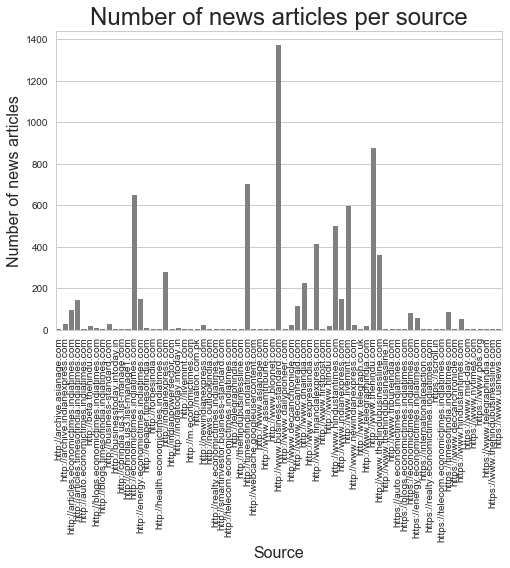

In [141]:
counts= trends_source_count.reset_index()
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.barplot(x="source", y='Global_impact',color="gray", data=counts)
plt.title('Number of news articles per source', fontsize = 24)
plt.xticks(rotation='vertical')
plt.xlabel('Source', fontsize = 16)
plt.ylabel('Number of news articles', fontsize = 16)
plt.show()

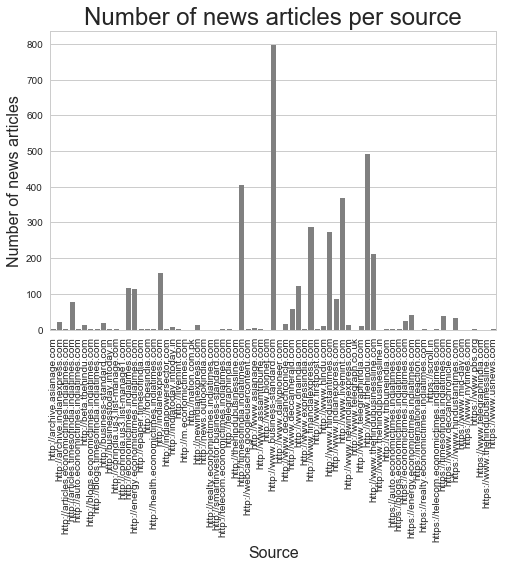

In [142]:
counts= trends_source_sum.reset_index()
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.barplot(x="source", y='mit',color="gray", data=counts)
plt.title('Number of news articles per source', fontsize = 24)
plt.xticks(rotation='vertical')
plt.xlabel('Source', fontsize = 16)
plt.ylabel('Number of news articles', fontsize = 16)
plt.show()

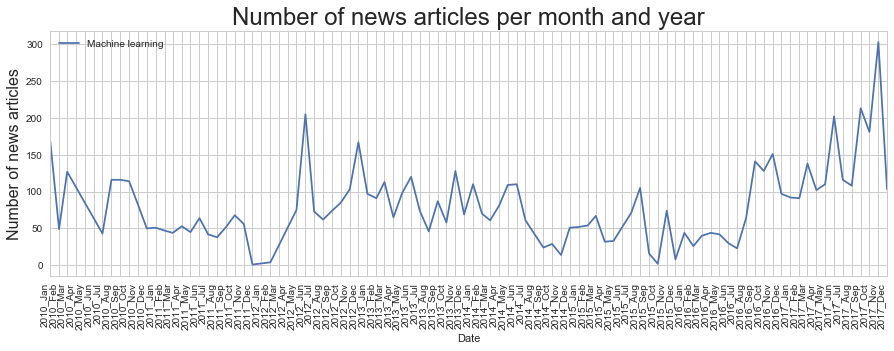

In [143]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
trends_Month_Year_count['Global_impact'].plot(label="Machine learning")
plt.title("Number of news articles per month and year", fontsize = 24)
plt.ylabel("Number of news articles", fontsize = 16)
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y_%b'))
plt.show()

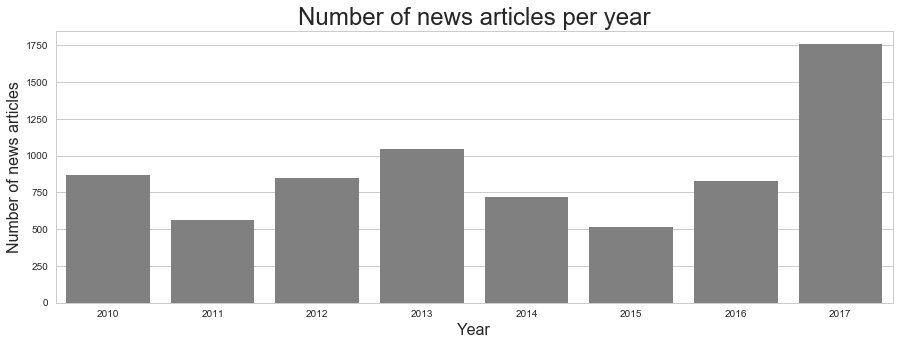

In [144]:
counts= trends_Year_count.reset_index()
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.barplot(x="year", y='Global_impact',color="gray", data=counts)
plt.title('Number of news articles per year', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of news articles', fontsize = 16)
plt.show()

In [ ]:
import numpy as np
#manual_trends['Global_impact'].plot(label="Manually coded")
trends_Month_Year_sum['Global_impact'].plot(label="Machine learning")
plt.title("Global impact", fontsize = 24)
plt.ylabel("Number of news articles", fontsize = 16)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y_%b'))
#plt.xticks(np.arange(xvalues.size), xvalues, rotation=90)
plt.show()

In [ ]:
counts= trends_Year_mean.reset_index()
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.barplot(x="year", y='Global_impact',color="gray", data=counts)
plt.title('Mean number of news articles addressing Global Impact', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of news articles', fontsize = 16)
plt.show()

In [ ]:
import numpy as np
#manual_trends['India_impact'].plot(label="Manually coded")
trends_Month_Year_sum['India_impact'].plot(label="Machine learning")
plt.title('Number of news articles addressing India Impact', fontsize = 24)
plt.ylabel('Number of news articles', fontsize = 16)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y_%b'))
#plt.xticks(np.arange(xvalues.size), xvalues, rotation=90)
plt.show()

In [ ]:
counts= trends_Year_mean.reset_index()
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.barplot(x="year", y='India_impact',color="gray", data=counts)
plt.title('Mean Number of news articles addressing India Impact', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of news articles', fontsize = 16)
plt.show()

In [ ]:
import numpy as np
#manual_trends['Science'].plot(label="Manually coded")
trends_Month_Year_sum['Science'].plot(label="Machine learning")
plt.title('Number of news articles discussing Science', fontsize = 24)
plt.ylabel('Number of news articles', fontsize = 16)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y_%b'))
#plt.xticks(np.arange(xvalues.size), xvalues, rotation=90)
plt.show()

In [ ]:
import numpy as np
trends_Month_Year_sum['Policy'].plot(label="Machine learning")
plt.title('Number of news articles discussing Policy', fontsize = 24)
plt.ylabel('Number of news articles', fontsize = 16)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y_%b'))
plt.show()

In [ ]:
counts= trends_Year_mean.reset_index()
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.barplot(x="year", y='Policy',color="gray", data=counts)
plt.title('Mean Number of news articles discussing Policy', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of news articles', fontsize = 16)
plt.show()

In [ ]:
import numpy as np
#manual_trends['Science'].plot(label="Manually coded")
trends_Month_Year_sum['Energy_policy'].plot(label="Machine learning")
plt.title("Energy_policy")
plt.ylabel("Proportion of news articles")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
#plt.xticks(np.arange(xvalues.size), xvalues, rotation=90)
plt.show()

In [ ]:
import numpy as np
trends_Month_Year_sum['Politics'].plot(label="Machine learning")
plt.title('Number of news articles discussing Politics', fontsize = 24)
plt.ylabel('Number of news articles', fontsize = 16)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y_%b'))
plt.show()

In [ ]:
counts= trends_Year_mean.reset_index()
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.barplot(x="year", y='Politics',color="gray", data=counts)
plt.title('Mean Number of news articles discussing Politics', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Mean Number of news articles', fontsize = 16)
plt.show()

In [ ]:
import numpy as np
trends_Month_Year_sum['Buisness'].plot(label="Machine learning")
plt.title("Buisness")
plt.ylabel("Proportion of news articles")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
#plt.xticks(np.arange(xvalues.size), xvalues, rotation=90)
plt.show()

In [ ]:
import numpy as np
trends_Month_Year_sum['mit'].plot(label="Machine learning")
plt.title('Number of news articles discussing Mitigation', fontsize = 24)
plt.ylabel('Number of news articles', fontsize = 16)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y_%b'))
plt.show()

In [ ]:
counts= trends_Year_mean.reset_index()
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.barplot(x="year", y='mit',color="gray", data=counts)
plt.title('Mean Number of news articles discussing Mitigation', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Mean Number of news articles', fontsize = 16)
plt.show()

In [ ]:
import numpy as np
trends_Month_Year_sum['adapt'].plot(label="Machine learning")
plt.title("adapt")
plt.ylabel("Proportion of news articles")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
#plt.xticks(np.arange(xvalues.size), xvalues, rotation=90)
plt.show()

In [ ]:
import numpy as np
trends_Month_Year_sum['equity'].plot(label="Machine learning")
plt.title('Number of news articles discussing Equity', fontsize = 24)
plt.ylabel('Number of news articles', fontsize = 16)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y_%b'))
plt.show()

In [ ]:
counts= trends_Year_mean.reset_index()
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.barplot(x="year", y='equity',color="gray", data=counts)
plt.title('Mean Number of news articles discussing Equity', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Mean Number of news articles', fontsize = 16)
plt.show()

In [ ]:
import numpy as np
trends_Month_Year_sum['ACDC'].plot(label="Machine learning")
plt.title("ACDC")
plt.ylabel("Proportion of news articles")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
#plt.xticks(np.arange(xvalues.size), xvalues, rotation=90)
plt.show()

In [ ]:
data1 = manual_trends['mit']
data2 = trends_Month_Year['mit']
t1 = manual_trends.index
t2 = trends_Month_Year.index
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Proportion of news articles -Manually coded', color=color)
ax1.plot(t1, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Proportion of news articles- Machine Learning', color=color)  # we already handled the x-label with ax1
ax2.plot(t2, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Number of news articles discussing Mitigation")
plt.show()